# Remove Correlated Features

The correlated features can cause multicollinearity problem in machine learning modelling and Hence, we should remove correlated featues.

- Feature space to target is desirable.
- Feature correlated with another feature is not desirable.
- If 2 features are highly correalted then 1 of them should be removed.
- Correlation among multiple features increases model complexity.
- Removing these features increase model performance.
- Different models shows different performance over correlated features.

In [111]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [113]:
# Read the data

df=pd.read_csv('santander-train.csv', nrows=20000)

df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [114]:
X=df.drop('TARGET', axis=1)

y=df['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [115]:
# Do train test split at start only to avoid overfitiing problem.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [131]:
def RemoveConstantFeatures(X_df, X_train): 
    const_filter=VarianceThreshold(threshold=0)
    const_filter.fit(X_train)
    X_train_filter=const_filter.transform(X_train)
    
    # get list of constant features
    const_list=[not temp for temp in const_filter.get_support()]
    X_df.columns[const_list]
    print('RemoveConstantFeatures: Removed Features are :', X_df.columns[const_list])

    return X_train_filter

# Calling function : RemoveConstantFeatures
X_train_filter=RemoveConstantFeatures(X,X_train)
X_test_filter=RemoveConstantFeatures(X,X_test)

RemoveConstantFeatures: Removed Features are : Index(['ind_var2_0', 'ind_var2', 'ind_var18_0', 'ind_var18', 'ind_var27_0',
       'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34',
       'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var18_0', 'num_var18',
       'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0',
       'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var18',
       'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41',
       'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_aport_var33_ult1',
       'imp_var7_emit_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3',
       'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1',
       'imp_tra

In [133]:
def RemoveQuasiConstantFeatures(X_df,X_train_filter): 
    const_filter=VarianceThreshold(threshold=0.01)
    const_filter.fit(X_train_filter)
    X_train_quasi_filter=const_filter.transform(X_train_filter)
    
    # get list of constant features
    const_list=[not temp for temp in const_filter.get_support()]
    X_df.columns[const_list]
    print('RemoveQuasiConstantFeatures: Removed Features are :', X_df.columns[const_list])
    
    return X_train_quasi_filter

# Calling function : RemoveQuasiConstantFeatures
X_train_quasi_filter=RemoveQuasiConstantFeatures(X,X_train_filter)
X_test_quasi_filter=RemoveQuasiConstantFeatures(X,X_test_filter)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 370 but corresponding boolean dimension is 303

In [118]:
def RemoveDuplicateFeatures(X_train): 
    # Transpose the input
    X_train_Dup_T = X_train.T
    # Convert into Pandas DataFrames
    X_train_Dup_T=pd.DataFrame(X_train_Dup_T)
    # Remove duplicate from DF
    X_Unique=X_train_Dup_T[[not index for index in X_train_Dup_T.duplicated()]].T
    return X_Unique

# Calling function : RemoveDuplicateFeatures    
X_train_dup_filter = RemoveDuplicateFeatures(X_train_quasi_filter)
X_test_dup_filter =RemoveDuplicateFeatures(X_test_quasi_filter)   

In [119]:
X_train_dup_filter.shape, X_test_dup_filter.shape

((16000, 233), (4000, 215))

# Remove Correlated Features

In [121]:
cormat=X_train_dup_filter.corr()

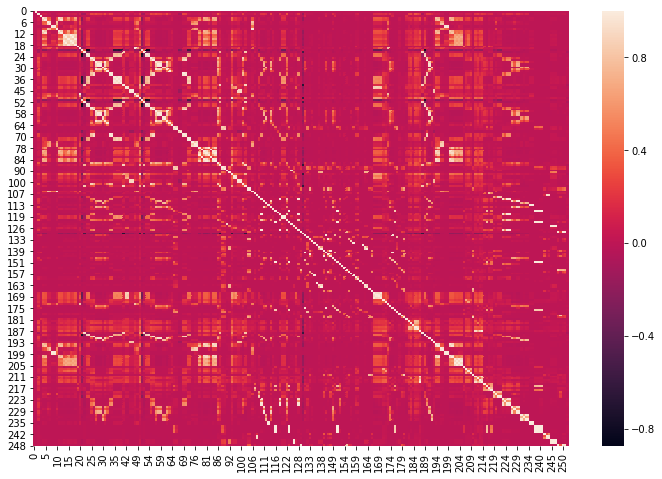

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(cormat)

In [123]:
# Function: RemoveCorrelatedFeatures()

def RemoveCorrelatedFeatures(data, threshold):     
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)): 
        for j in range(i): 
            if abs(corrmat.iloc[i,j]) > threshold: 
                colname=corrmat.columns[i]
                corr_col.add(colname)                
    
    data_uncorrelated=data.drop(labels=corr_col, axis=1)
  
    return data_uncorrelated, corr_col

In [124]:
X_train_uncorrelated, corr_col=RemoveCorrelatedFeatures(X_train_dup_filter, 0.85)
#X_test_uncorrelated, corr_col=RemoveCorrelatedFeatures(X_test_dup_filter, 0.85)

In [125]:
X_train_uncorrelated.shape, X_test_uncorrelated.shape

((16000, 110), (4000, 92))

In [126]:
X_train_uncorrelated.columns

Int64Index([  0,   1,   2,   3,   4,   6,   8,  10,  13,  19,
            ...
            218, 219, 220, 224, 228, 231, 232, 242, 249, 252],
           dtype='int64', length=110)

In [127]:
def RemoveCorrelatedFeatures_KeepAtleastOne(data, threshold=0.85): 

    corr_col=set()
    cormat=data.corr()
    for i in range(len(cormat.columns)): 
        for j in range(i): 
            if abs(cormat.iloc[i,j]) > threshold: 
                colname=cormat.columns[i]
                corr_col.add(colname)
                
    corrdata=cormat.abs().stack()
    corrdata.sort_values(ascending=False)
    corrdata=corrdata[corrdata>threshold]
    corrdata=corrdata[corrdata<1]
    corrdata=pd.DataFrame(corrdata).reset_index()
    corrdata.columns = ['feature1','feature2','corr_value']
    
    grouped_feature_list=[]
    correlated_group_list=[]
    for feature in corrdata.feature1.unique(): 
        if feature not in grouped_feature_list: 
            correlated_block=corrdata[corrdata.feature1==feature]
            grouped_feature_list=grouped_feature_list+list(correlated_block.feature2.unique())+[feature]
            correlated_group_list.append(correlated_block)
    
    
    important_features=[]

    for group in correlated_group_list: 
        features=list(group.feature1.unique())+list(group.feature2.unique())
        rf=RandomForestClassifier(n_estimators=100, random_state=0)
        rf.fit(data[features], y_train)
        
        importance=pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
        importance.columns=['features','importance']
        importance.sort_values(by = 'importance', ascending=False, inplace=True)
        feat=importance.iloc[0]
        important_features.append(feat) 
        
    important_features=pd.DataFrame(important_features)
    important_features.reset_index(inplace=True, drop=True)
    features_to_consider=set(important_features['features'])
    features_to_discard=set(corr_col) - set(features_to_consider)
    features_to_discard=list(features_to_discard)
    data_grouped_uncorr=data.drop(labels=features_to_discard, axis=1)
    
    print('RemoveCorrelatedFeatures_KeepAtleastOne: Removed Features are :', features_to_discard)
    
    return data_grouped_uncorr

# Calling function : RemoveCorrelatedFeatures_KeepAtleastOne      
X_train_uncorrelated=RemoveCorrelatedFeatures_KeepAtleastOne(X_train_dup_filter, 0.85)

In [129]:
X_train_uncorrelated.shape

(16000, 155)

# Feature Grouping 

In [75]:
corrdata=cormat.abs().stack()

In [76]:
cormat

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.000000,-0.020081,-0.002738,0.004255,-0.002476,-0.004844,-0.019292,-0.019204,0.000747,0.000747,...,0.001909,-0.001239,0.007243,0.008619,0.008251,0.017632,-0.003098,0.019556,0.020226,-0.002571
1,-0.020081,1.000000,-0.007256,0.001759,0.009098,0.008824,0.001626,0.001763,0.000567,0.000594,...,0.000437,0.000524,0.000482,0.000512,0.000515,0.000675,0.000658,0.000781,0.000889,0.000256
2,-0.002738,-0.007256,1.000000,0.035700,0.102476,0.104345,0.052704,0.061132,0.004779,0.005730,...,0.023319,0.025381,0.017047,0.018462,0.018290,0.032318,0.017499,0.039525,0.043192,0.000463
3,0.004255,0.001759,0.035700,1.000000,0.033359,0.026165,0.013013,0.011555,-0.000588,-0.000613,...,0.007109,0.011811,-0.000496,-0.000505,-0.000495,-0.000698,-0.000651,-0.000810,-0.000922,0.001191
4,-0.002476,0.009098,0.102476,0.033359,1.000000,0.872418,0.371859,0.343419,0.014356,0.015819,...,0.000903,0.002490,0.021486,0.023047,0.024093,-0.001635,0.001362,-0.002644,-0.002890,0.004334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.017632,0.000675,0.032318,-0.000698,-0.001635,-0.000851,-0.000639,-0.000687,-0.000225,-0.000234,...,0.001486,0.004209,0.008295,0.010979,0.010357,1.000000,0.322091,0.963324,0.929162,0.003246
249,-0.003098,0.000658,0.017499,-0.000651,0.001362,0.007891,-0.000596,-0.000640,-0.000210,-0.000219,...,-0.000162,-0.000194,-0.000177,-0.000189,-0.000190,0.322091,1.000000,0.257248,0.258221,0.013552
250,0.019556,0.000781,0.039525,-0.000810,-0.002644,-0.002251,-0.000741,-0.000796,-0.000261,-0.000272,...,0.005428,0.014740,0.007585,0.010051,0.009478,0.963324,0.257248,1.000000,0.989442,0.004392
251,0.020226,0.000889,0.043192,-0.000922,-0.002890,-0.002425,-0.000844,-0.000907,-0.000297,-0.000309,...,0.005206,0.014189,0.010233,0.013550,0.012781,0.929162,0.258221,0.989442,1.000000,0.005154


In [77]:
corrdata.sort_values(ascending=False)

54   24     1.000000
24   54     1.000000
23   53     1.000000
53   23     1.000000
113  237    1.000000
              ...   
84   164    0.000003
138  84     0.000003
84   138    0.000003
123  153    0.000001
153  123    0.000001
Length: 54289, dtype: float64

In [78]:
corrdata=corrdata[corrdata>0.85]
corrdata=corrdata[corrdata<1]
corrdata

4    5      0.872418
     11     0.940139
5    4      0.872418
     12     0.947774
6    7      0.899149
              ...   
250  248    0.963324
     251    0.989442
251  129    0.983959
     248    0.929162
     250    0.989442
Length: 522, dtype: float64

In [79]:
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['feature1','feature2','corr_value']

In [80]:
corrdata

,feature1,feature2,corr_value
0,4,5,0.872418
1,4,11,0.940139
2,5,4,0.872418
3,5,12,0.947774
4,6,7,0.899149
...,...,...,...
517,250,248,0.963324
518,250,251,0.989442
519,251,129,0.983959
520,251,248,0.929162


In [81]:
grouped_feature_list=[]
correlated_group_list=[]
for feature in corrdata.feature1.unique(): 
    if feature not in grouped_feature_list: 
        correlated_block=corrdata[corrdata.feature1==feature]
        grouped_feature_list=grouped_feature_list+list(correlated_block.feature2.unique())+[feature]
        correlated_group_list.append(correlated_block)

In [82]:
for group in correlated_group_list: 
    print(group)
    

   feature1  feature2  corr_value
0         4         5    0.872418
1         4        11    0.940139
   feature1  feature2  corr_value
4         6         7    0.899149
   feature1  feature2  corr_value
6         8         9    0.997883
7         8       198    0.987352
8         8       199    0.968772
    feature1  feature2  corr_value
12        10       106    0.967179
    feature1  feature2  corr_value
15        12         5    0.947774
16        12        11    0.867604
    feature1  feature2  corr_value
17        13        14    0.919547
18        13        15    0.881763
19        13        16    0.993487
20        13        17    0.919663
21        13        18    0.869681
    feature1  feature2  corr_value
39        20        48         1.0
    feature1  feature2  corr_value
40        21        23    0.872953
41        21        51    0.921279
42        21        53    0.872953
    feature1  feature2  corr_value
43        22        52    0.993660
44        22       188    0.9

# Feature Importance based on tree based classifier

In [83]:
X_train_dup_filter[5]

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
15995      0.00
15996    315.03
15997    673.74
15998      0.00
15999      0.00
Name: 5, Length: 16000, dtype: float64

In [96]:
important_features=[]

for group in correlated_group_list: 
    features=list(group.feature1.unique())+list(group.feature2.unique())
    rf=RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_dup_filter[features], y_train)
    
    importance=pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by = 'importance', ascending=False, inplace=True)
    feat=importance.iloc[0]
    important_features.append(feat)   

In [97]:
important_features=pd.DataFrame(important_features)

In [98]:
important_features.reset_index(inplace=True, drop=True)

In [99]:
print(important_features)

    features  importance
0        5.0    0.426152
1        7.0    0.539444
2        9.0    0.324059
3      106.0    0.604123
4       12.0    0.365771
5       15.0    0.300290
6       48.0    0.510000
7       51.0    0.332281
8      188.0    0.406329
9      189.0    0.372502
10     102.0    0.383259
11     190.0    0.443022
12      57.0    0.350747
13      60.0    0.433167
14      63.0    0.510000
15      35.0    0.281367
16      87.0    0.401571
17     168.0    0.311237
18      97.0    0.506090
19      93.0    0.515789
20     189.0    0.372502
21      88.0    0.698029
22      67.0    0.615728
23      73.0    0.497980
24      77.0    0.877148
25     197.0    0.303843
26      81.0    0.291921
27      83.0    0.522464
28     201.0    0.238390
29      88.0    0.461670
30     124.0    0.510000
31      95.0    0.608576
32     105.0    0.510000
33     243.0    0.457047
34     109.0    0.512567
35     128.0    0.937259
36     230.0    0.411518
37     113.0    0.514286
38     123.0    0.701386


In [100]:
features_to_consider=set(important_features['features'])

In [106]:
features_to_discard=set(corr_col) - set(features_to_consider)

In [107]:
features_to_discard=list(features_to_discard)

In [108]:
X_train_grouped_uncorr=X_train_dup_filter.drop(labels=features_to_discard, axis=1)

In [110]:
X_train_grouped_uncorr.shape

(16000, 155)